In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_currency_feature(img):
    #to ensure that image is in gray scale
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #declaring orb object
    orb=cv2.ORB_create()
    #find key points with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    
    return kp, des
    

In [42]:
def guess(x,Kp,des): #kp,des of the input image , x is the images/
    T_1,T_2=get_currency_feature(x)
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des,T_2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    sum_of_matches=0
    sum_of_matches=[sum_of_matches+matches[i].distance for i in range(0,5)]
    return sum_of_matches

In [34]:
half_pound_front=cv2.imread('dataset//half_pound_coin_front.png')
half_pound_back=cv2.imread('dataset//half_pound_coin_back.png')
one_pound_back=cv2.imread('dataset//one_pound_coin_back.png')
one_pound_front=cv2.imread('dataset//one_pound_coin_front.png')
one_pound_back_paper=cv2.imread('dataset//one_pound_paper_back.png')
one_pound_front_paper=cv2.imread('dataset//one_pound_paper_front.png')
five_pound_front_paper=cv2.imread('dataset//5 part_1.jpg')
five_pound_back_paper=cv2.imread('dataset//five_pound_paper_back.jpg')


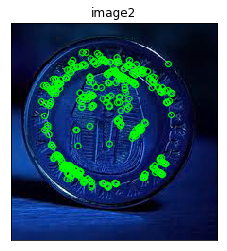

In [43]:
img=cv2.imread('dataset//one_pound_test.jpg')
img_1=np.copy(img)
M,N=get_currency_feature(img)
img2 = cv2.drawKeypoints(img_1,M,None,color=(0,255,0), flags=0)
plt.imshow(img2),plt.title('image2'),plt.xticks([]),plt.yticks([])
plt.show()
#display image just for visualization

In [44]:
overall_matches=[]
money_sorted=[0.5,0.5,1,1,1,1,5,5]
m_1=guess(half_pound_front,M,N)
overall_matches.append(m_1)

m_2=guess(half_pound_back,M,N)
overall_matches.append(m_2)

m_3=guess(one_pound_back,M,N)
overall_matches.append(m_3)

m_4=guess(one_pound_front,M,N)
overall_matches.append(m_4)

minimum_dis=overall_matches.index(min(overall_matches))
#the predicted money is
predicted=money_sorted[minimum_dis]
print (predicted)

1
